##### 경사하강법

### 잔차제곱합 (Residual Sum of Squares, RSS)
- 잔차 = 실제 값 - 예측 값
- 잔차제곱합 = (실제 값 - 예측 값)의 제곱의 합
- 회귀 모델의 정확도를 측정하는 지표
    - RSS가 작을수록 정확하게 예측하는 모델
    - RSS가 클수록 잘못된 예측하는 모델

- 모든 회귀 모델은 **RSS가 최소**가 되는 방향으로 학습이 진행됨 = 회귀계수(절편)는 RSS가 최소가 되도록 학습
- 비용함수 R(w)가 가장 작을 때의 w를 찾는 것이 회귀 모델의 목표
    - 매 회차에 계산된 R(w)에서 순간변화율(기울기)를 구해야 함 → 미분 사용
    - 단, 우리가 구해야 하는 회귀계수는 하나 이상이므로 우리는 편미분을 사용함
        - w0(절편)을 고정한 채로 w1의 미분을 구하고, w1을 고정한 채로 w0 미분을 구함

<img src="https://d.pr/i/0vERpX+" alt="경사하강법" width="500">


##### 학습률(Learning Rate)
- 최적의 해를 빠르게 or 천천히 조금씩 찾아가는 정도를 가르키는 하이퍼 파라미터
- 기본값으로 보통 0.001 사용
  (줄어들수록 좀 더 촘촘히 검사. 커질수록 크게 검사)

**경사하강법 수식**

$w_1$ $w_0$을 반복적으로 업데이트하며 최적의 회귀계수를 찾음
<br/>
$w_1 = w_1 - (-η\frac{2}{N}\sum^{N}_{i=1} x_i * (실제값_i - 예측값_i))$
<br/>
$w_0 = w_0 - (-η\frac{2}{N}\sum^{N}_{i=1}(실제값_i - 예측값_i))$

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

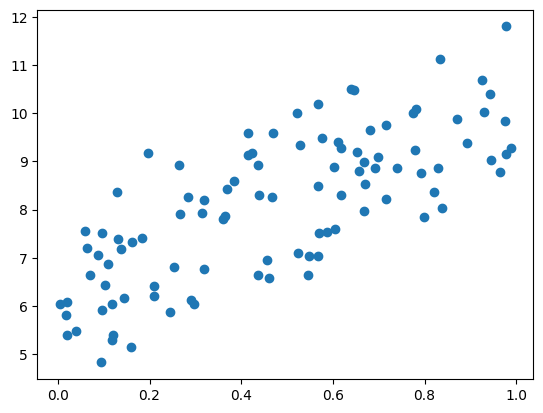

In [38]:
np.random.seed(0)

X = np.random.rand(100, 1)
# 0~1 사이 난수 (균등분포) 100개 생성

noise = np.random.randn(100, 1)
# 정규분포 난수를 노이즈로 사용할 것.

y = 6+4*X + noise
# 선형 회귀 1차 함수 생성. 다양한 분포를 위해 noise 추가

plt.scatter(X, y)
plt.show()

**경사하강법 공식**

$w1 = w1 - (미분값)$

$w1 = w1 - (-학습률 * 2 / N * (x * (실제값 - 예측값))의 합)$

$w0 = w0 - (미분값)$

$w0 = w0 - (-학습률 * 2 / N * (실제값 - 예측값)의 합)$

(평균 제곱 오차 MSE를 사용)

In [ ]:
# 경사하강법 실행

# 회귀계수(가중치)를 모델이 초기화 해서 갖고 있음. 0으로 초기화 해줄 것
w0 = np.zeros((1, 1))
w1 = np.zeros((1, 1))
# 입력 데이터도 2차원 배열이므로 2차원으로 초기화

# 잔차 계산
y_pred = w0 + np.dot(X, w1)
#(와이 햇) = (X와 w1의 내적) + (절편)
diff = y-y_pred
# diff가 행렬처럼 생겼을 것

# 학습률
learning_rate = 0.01

# 데이터 개수
N=len(X)

# w0 편미분(w0를 갱신할 값)
w0_diff = (-learning_rate * (2/N) * np.sum(diff))
# w0 절편 갱신
w0 -= w0_diff

#w1 편미분 (w1를 갱신할 값)
w1_diff = (-learning_rate * (2/N) * np.dot(X.T, diff))
# 두 행렬 shape이 각각 (100, 1), (100, 1)이므로 원하는 값을 위해 (1, 100) x (100, 1) 연산
# 행렬 간 내적 -> 곱해서 더하는 꼴이 됨
# w1 가중치 갱신
w1 -= w1_diff

print(f'1회 업데이트 된 회귀계수 w1: {w1}, 절편: {w0}')
# 출력: w1: [[0.08298126]], 절편: [[0.16167019]]
# 초깃값을 0, 0으로 설정해둠. 목적지인 회귀계수는 4x + 6이므로, 여기까지 올라갈 것



1회 업데이트 된 회귀계수 w1: [[0.08298126]], 절편: [[0.16167019]]


In [ ]:
# 함수로 만들자 !

def gradient_descent(X, y, learning_rate=0.01, max_iter=1000):
# max_iter: 최대 반복할 횟수
    # 회귀계수(가중치)를 모델이 초기화 해서 갖고 있음. 0으로 초기화 해줄 것
    w0 = np.zeros((1, 1))
    w1 = np.zeros((1, 1))
    # 입력 데이터도 2차원 배열이므로 2차원으로 초기화

    # 데이터 개수    
    N=len(X)
    
    for i in range(max_iter):
        # 잔차 계산
        y_pred = w0 + np.dot(X, w1)
        #(와이 햇) = (X와 w1의 내적) + (절편)
        diff = y-y_pred
        # diff가 행렬처럼 생겼을 것

        # w0 편미분(w0를 갱신할 값)
        w0_diff = (-learning_rate * (2/N) * np.sum(diff))
        # w0 절편 갱신
        w0 -= w0_diff

        #w1 편미분 (w1를 갱신할 값)
        w1_diff = (-learning_rate * (2/N) * np.dot(X.T, diff))
        # 두 행렬 shape이 각각 (100, 1), (100, 1)이므로 원하는 값을 위해 (1, 100) x (100, 1) 연산
        # 행렬 간 내적 -> 곱해서 더하는 꼴이 됨
        # w1 가중치 갱신
        w1 -= w1_diff

        # if ((i+1)%50 == 0):
        #     #시각화
        #     plt.figure(figsize=(3, 2))
        #     plt.scatter(X, y)
        #     plt.plot(X, y_pred, color='red')
        #     plt.show()
            
            # print(f'{i+1}회 업데이트 된 회귀계수 w1: {w1}, 절편: {w0}')

    return w0, w1

In [ ]:
w0, w1 = gradient_descent(X, y)
w0, w1
# (array([[6.30473552]]), array([[3.77397397]]))
# 각각 6, 4와 근접한 값
# max_iter를 더 크게 잡으면 더 근접한 값 나옴

In [42]:
# 비용함수 따로 ...

def cost_function(y_true, y_pred):
    return np.sum((y_true-y_pred)**2) / len(y_true)

In [43]:
y_pred = w0 + np.dot(X, w1)
# 특성에 따른 예측치 저장
print('비용함수 결과:', cost_function(y, y_pred))

비용함수 결과: 0.9946766142140662


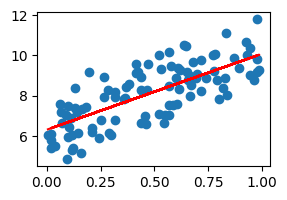

In [40]:
plt.figure(figsize=(3, 2))
plt.scatter(X, y)
plt.plot(X, y_pred, color='red')
plt.show()

In [52]:
# mini batch 함수

def mini_batch_gradient_descent(X, y, batch_size = 10, learning_rate=0.01, max_iter=1000):
# batch_size: 배치 크기
    # 회귀계수(가중치)를 모델이 초기화 해서 갖고 있음. 0으로 초기화 해줄 것
    w0 = np.zeros((1, 1))
    w1 = np.zeros((1, 1))
    # 입력 데이터도 2차원 배열이므로 2차원으로 초기화

    # 데이터 개수    
    N=batch_size
    
    for i in range(max_iter):
        # 미니배치 데이터 선정
        random_index = np.random.permutation(X.shape[0])
        # 데이터의 인덱스를 1차원 배열 형태로 무작위 섞음
        X_sample = X[random_index[:batch_size]]
        y_sample = y[random_index[:batch_size]]
        # batch size만큼 슬라이싱해서 그 인덱스를 인덱싱

        # 잔차 계산
        y_pred = w0 + np.dot(X_sample, w1)
        #(와이 햇) = (X와 w1의 내적) + (절편)
        diff = y_sample-y_pred
        # diff가 행렬처럼 생겼을 것

        # w0 편미분(w0를 갱신할 값)
        w0_diff = (-learning_rate * (2/N) * np.sum(diff))
        # w0 절편 갱신
        w0 -= w0_diff

        #w1 편미분 (w1를 갱신할 값)
        w1_diff = (-learning_rate * (2/N) * np.dot(X_sample.T, diff))
        # 두 행렬 shape이 각각 (100, 1), (100, 1)이므로 원하는 값을 위해 (1, 100) x (100, 1) 연산
        # 행렬 간 내적 -> 곱해서 더하는 꼴이 됨
        # w1 가중치 갱신
        w1 -= w1_diff
        
        if ((i+1) % 100 == 0):
            plt.figure(figsize=(3, 2))
            plt.scatter(X_sample, y_sample)
            plt.plot(X_sample, y_pred, color='red')
            plt.show()

            # print(f'{i+1}회 업데이트 된 회귀계수 w1: {w1}, 절편: {w0}')

    return w0, w1

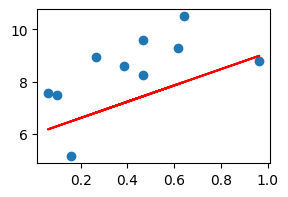

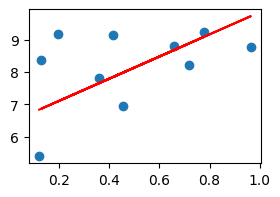

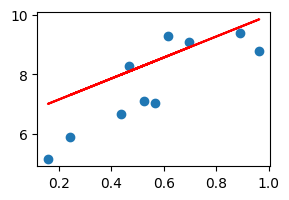

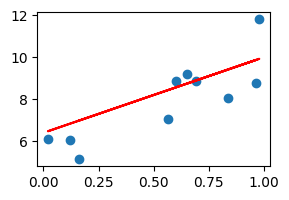

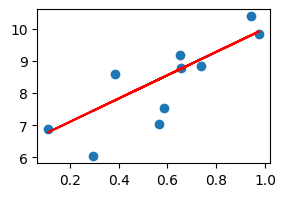

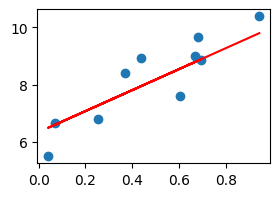

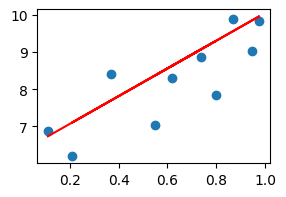

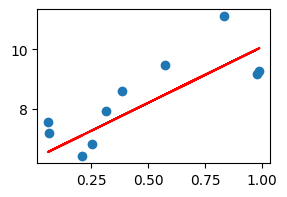

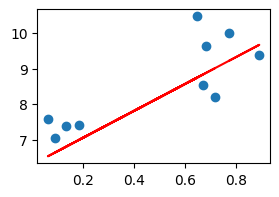

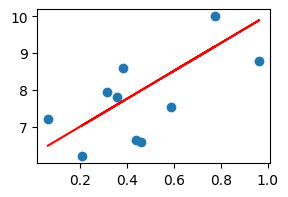

회귀계수 w1: [[3.78662126]], 절편: [[6.23970434]]


In [ ]:
w0, w1 = mini_batch_gradient_descent(X, y)
print(f'회귀계수 w1: {w1}, 절편: {w0}')

# 랜덤으로 배치를 설정하므로 실행할 때마다 값이 바뀜